In [ ]:
# Author : Akash K S
# Roll No : CS22MTECH11012

import numpy as np
import torch
import matplotlib.pyplot as plt

## 1. Perceptron learning algorithm

In [ ]:
# function to plot the data before training
def plot_before_training(W, D1, D2):
  x = np.linspace(-5,5,500)
  y = np.zeros(500,) 
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W before training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(D1[:,0], D1[:,1])
  plt.scatter(D2[:,0], D2[:,1])
  plt.grid()
  plt.show()

In [ ]:
# Plot the linear classification
def plot_after_training(W, D1, D2):
    x = np.linspace(-5, 5, 500)
    y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
    plt.plot(x, y, 'r', label = 'W')
    plt.title('Graph of W after training')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.legend(loc='upper left')
    plt.scatter(D1[:,0], D1[:,1])
    plt.scatter(D2[:,0], D2[:,1])
    plt.grid()
    plt.show()

In [ ]:
# Perceptron learning Algorithm
def train_perceptron(x, y, w, nb_epochs_max):
    total_changes = 0
    e = 0
    for e in range(nb_epochs_max):
        nb_changes = 0
        for i in range(x.size(0)):
            if x[i].dot(w) * y[i] <= 0:
                w = w + y[i] * x[i]
                nb_changes = nb_changes + 1
        total_changes += nb_changes
        if nb_changes == 0:
            break;
    avg_noOf_changes = np.ceil(total_changes/e)
    print('Average no of changes:', avg_noOf_changes)  # prints the average number of chages
    return w, avg_noOf_changes

### Training the perceptron for data with different levels of separability and plotting the classification for every level of separability

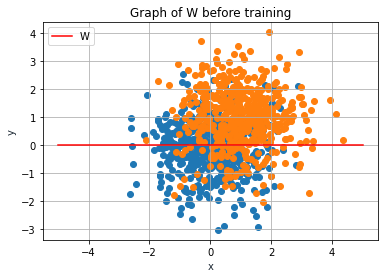

Average no of changes: 442.0
tensor([-2.6333, -1.4652, -1.0000])


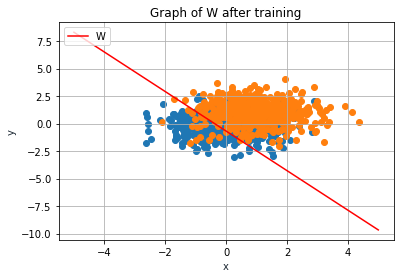

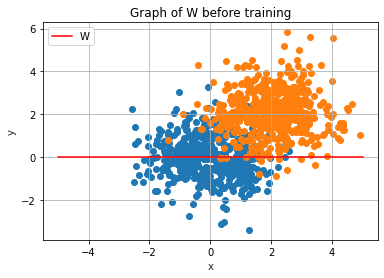

Average no of changes: 134.0
tensor([-4.4290, -4.2341,  6.0000])


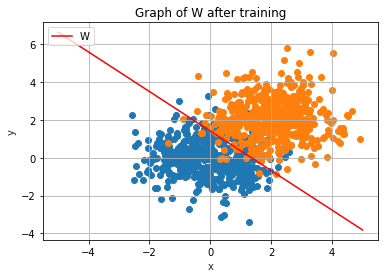

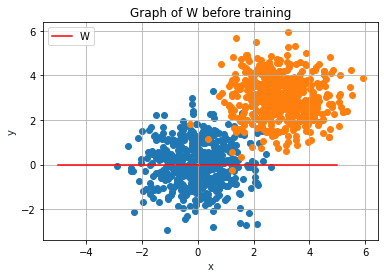

Average no of changes: 39.0
tensor([-3.8622, -3.4107, 13.0000])


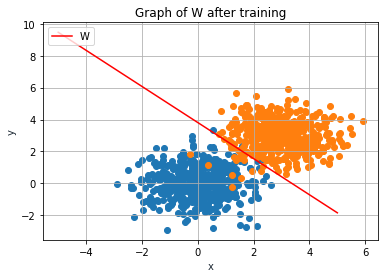

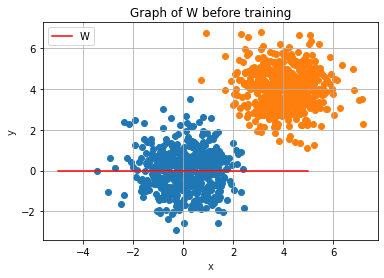

Average no of changes: 14.0
tensor([-1.9824, -1.6685,  8.0000])


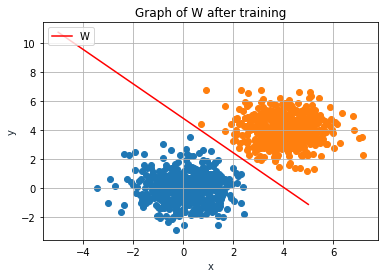

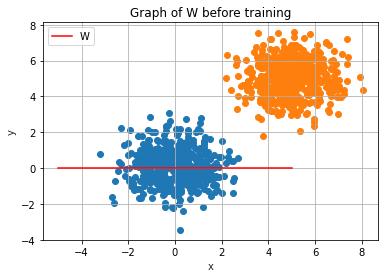

Average no of changes: 17.0
tensor([-2.0471, -1.9526, 11.0000])


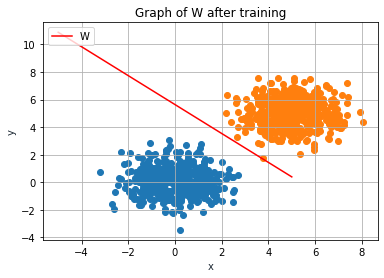

[442. 134.  39.  14.  17.]


In [ ]:
levels_of_separability = [1, 2, 3, 4, 5]
no_of_iterations = np.zeros(5)
mean = 0.0
i = 0

for separability in levels_of_separability:
  # Creating training data with different levels of separability
  D1 = torch.normal(mean, 1.0, size = [500, 2])
  D2 = torch.normal(mean + separability, 1.0, size = [500, 2]) # Adding separability to the mean
  
  # Creating empty tensor with extra dim which is to add x0 = 1
  X = torch.empty(1000, D1.size(1)+1).fill_(1)
  X[::2, :2] = D1
  X[1::2, :2] = D2
  
  # Creating the labels for training data
  Y = torch.empty(1000, 1)
  Y[::2, :2] = 1
  Y[1::2, :2] = -1
  
  # Initiating the w parameter
  w = torch.empty(X.size(1)).fill_(0)

  # plotting before training
  plot_before_training(W, D1, D2)
  
  # Training the perceptron. The function returns the parameter vector and avg no of iterations
  W, no_of_iterations[i] = train_perceptron(X, Y, w, 5)
  i += 1
  
  print(W)
  plot_after_training(W, D1, D2)
print(no_of_iterations)


Text(0, 0.5, 'No of Iterations')

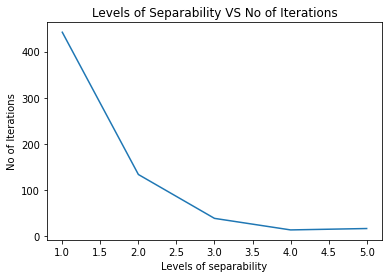

In [ ]:
# Plotting no of itererations vs levels of separability 
plt.plot(levels_of_separability, no_of_iterations)
plt.title('Levels of Separability VS No of Iterations')
plt.xlabel('Levels of separability')
plt.ylabel('No of Iterations')

## Observation:

From the above "Levels of Separability VS No of Iterations", we can observe that the average no of iterations for perceptron algorithm to converge will decrease as the seperability of the data increases.

## 2. Gradient descent for training a linear classifier

In [ ]:
# Function for Creating the training data
def create_data():
  D1 = torch.normal(0.0, 1.0, size = [500, 2])
  D2 = torch.normal(4.0, 1.0, size = [500, 2])

  # Creating empty tensor with extra dim which is to add x0 = 1
  X = torch.empty(1000, D1.size(1)+1).fill_(1)
  X[::2, :2] = D1
  X[1::2, :2] = D2

  Y = torch.empty(1000, 1)
  Y[::2, :2] = 1
  Y[1::2, :2] = -1

  return X, Y, D1, D2

### The loss used here is hinge loss with L2 regualarization i.e, 
$$ {l(Y, y\_pred)} = \ max(0, 1 - Y * y\_pred) + \frac{1}{2} ||W||^2 $$


In [ ]:
# Defining the hinge loss function
def hinge_loss(y_pred, Y, w):
  #loss = torch.clamp(1 - Y * y_pred, min = 0)
  loss = torch.maximum(1 - Y * y_pred, torch.tensor(0))
  return loss.mean() + 0.5 * torch.sum(torch.square(w)) # Adding the regularization parameter

### And computing the gradient whenever there is mis classification i.e,
$$ {if\ } { (Y * y\_pred < 1):} $$
$$ \       grad\_W = \ - (Y * X) $$

In [ ]:
# Dedining the gradient
def compute_gradient(X, Y, y_pred):
  grad_W = -(Y * X).t()/X.size(0)
  grad_W = grad_W @ (Y * y_pred < 1).float()
  return grad_W

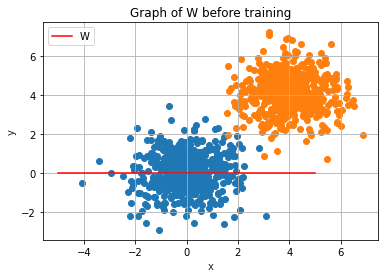

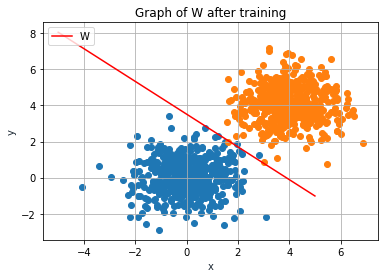

tensor([[-0.4202],
        [-0.4632],
        [ 1.6299]])


In [ ]:
X, Y, D1, D2 = create_data()

# Initiating the w parameter
w = torch.rand(3,1)

plot_before_training(w, D1, D2)

learning_rate = 0.01
no_iterations = 1000

for i in range(no_iterations):
  #finding the dot product W.X
  y_pred = torch.mm(X,w)

  # Calculating the loss
  loss = hinge_loss(y_pred, Y, w)

  # Computing gradient
  grad_w = compute_gradient(X, Y, y_pred)

  # Gradient Descent update
  w = w - learning_rate * grad_w
  
plot_after_training(w, D1, D2)
print(w)


## 3. MLP with a single hidden layer

## Creating training data as from normal distribution mean 0.0 and std dev 0.5 and assigning label Y = 1 for all the points whoes norm is > 0.5 and label Y = 0 otherwise

In [ ]:
# Fucntion to create data set of concentric circles
def create_concentric_circles():
  X = torch.normal(0.0, 0.5, size = [2000, 2])
  Y = torch.empty(X.shape[0]).fill_(0)

  plt.scatter(X[:,0], X[:,1])

  # Data points having norm of > 0.5 are class 1 (Y = 1) and others are class 2 (Y = 0)
  for i in range(X.shape[0]):
    if (np.linalg.norm(X[i]) > 0.5):
      Y[i] = 1
    else:
      Y[i] = 0

  # Plotting the generated data points
  plt.title('Graph of W before training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(X[:,0], X[:,1], c = Y)
  plt.grid()
  plt.show()

  Y = torch.reshape(Y, (Y.shape[0],1))
  return X, Y

In [ ]:
# ReLU function
def ReLU(x):
  #return torch.maximum(torch.tensor(0), x)
  return np.maximum(0, x)

# ReLU derivative function
def ReLU_derivative(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

### The loss used here is log loss (Binary cross entropy loss)
$$ {l(Y, y\_pred)} = \ -\frac{1}{N} \sum_{i=1}^N Y_{i} * log(y\_pred_{i}) + (1 - Y_{i}) * log(1 - y\_pred_{i}) $$

$$ \ {Here}, y\_pred = W^{T}X + b $$

### The gradients are computed and parameters are updated in back propagation

In [ ]:
# Class MLP
class MLP:
    # constructor: Initiates the needed parameters
    def __init__(self, no_of_hidden_units, X, Y):
      self.W1 = np.random.randn(X.shape[1], no_of_hidden_units) * 0.01
      self.b1 = np.zeros(shape =(1, no_of_hidden_units))

      self.W2 = np.random.randn(no_of_hidden_units, Y.shape[1]) * 0.01
      self.b2 = np.zeros(shape =(1, Y.shape[1]))

    def forward_pass(self, X):

      Z1 = np.dot(X, self.W1) + self.b1
      Z1 = torch.tensor(Z1)
      #A1 = torch.sigmoid(Z1)
      A1 = ReLU(Z1)

      Z2 = np.dot(A1, self.W2) + self.b2
      Z2 = torch.tensor(Z2)
      A2 = torch.sigmoid(Z2)

      return A1, Z1, A2, Z2

    def back_prop(self, A1, Z1, A2, Z2):
      m = Y.shape[0]

      # Computing the gradients
      learning_rate = 0.09
      dZ2 = A2 - Y
      dW2 = (1 / m) * np.dot(A1.T, dZ2) 
      db2 = (1 / m) * torch.sum(dZ2)

      dZ1 = np.multiply(np.dot(dZ2, self.W2.T), ReLU_derivative(A1))
      #dZ1 = np.multiply(np.dot(dZ2, self.W2.T), 1 - np.power(A1, 2))
      dW1 = (1 / m) * np.dot(X.T, dZ1)
      db1 = (1 / m) * torch.sum(dZ1)
        
      # Updating the parameters
      self.W1 = self.W1 - learning_rate * dW1
      self.b1 = self.b1 - learning_rate * db1.numpy()
      self.W2 = self.W2 - learning_rate * dW2
      self.b2 = self.b2 - learning_rate * db2.numpy()

      return self.W1, self.b1, self.W2, self.b2

    def loss_func(self, A2, Y):
      m = Y.shape[0]
      # implementing the loss formula
      #A2[A2 == 0] = math.exp(-10)
      #cost = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
      
      #loss = -np.mean(cost.numpy())

      cost = torch.multiply( Y,torch.log(A2)) + torch.multiply( 1-Y, torch.log(1-A2))
      loss = -torch.mean(cost)
      return loss

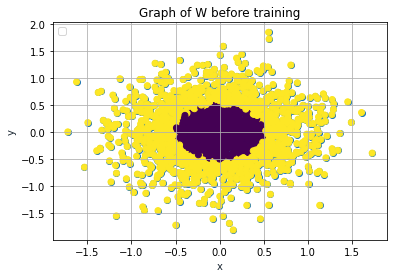

Text(0, 0.5, 'X2')

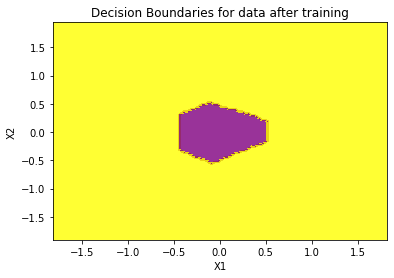

In [ ]:
# Creating the Data Set for concentric circles
X, Y = create_concentric_circles()

# Creating an instance of MLP class with hidden layer of 4 units
mlp = MLP(4, X, Y)

num_iterations = 4000

A2 = torch.empty(1000, 1).fill_(0)
loss = np.zeros(num_iterations)

# Training the MLP 
for i in range(num_iterations):
  # Forward prop. Inputs X and returns the calculated layer parameters
  A1, Z1, A2, Z2 = mlp.forward_pass(X)

  # computing the loss
  loss[i] = mlp.loss_func(A2, Y)

  # Calculating and updating gradients using back propagation
  W1, b1, W2, b2 = mlp.back_prop(A1, Z1, A2, Z2)

#************************** Plotting the contours to visualize the classification ***********************

# define bounds of the domain
min1, max1 = X[:, 0].min()-0.1, X[:, 0].max()+0.1
min2, max2 = X[:, 1].min()-0.1, X[:, 1].max()+0.1

# Generate a grid of points
xx, yy = np.meshgrid(np.linspace(min1, max1, 100), np.linspace(min2, max2, 100))

# Flatten the grid points
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Make predictions
a1, z1, a2, z2 = mlp.forward_pass(X_grid)

a2 = (a2.ravel() > 0.5) * 2 - 1

# Plot the decision boundary
plt.title('Decision Boundaries for data after training')
#plt.scatter(X[:,0], X[:,1], c = Y)
plt.contourf(xx, yy, a2.reshape(xx.shape), colors = ['purple','yellow'], alpha=0.8)


#Add a legend and labels to the axes 
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'Loss')

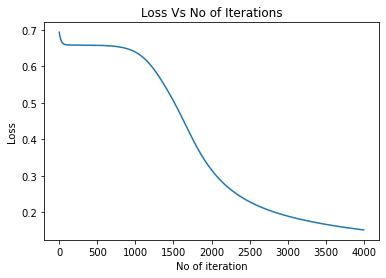

In [ ]:
# Loss vs iterations plot
plt.plot(range(num_iterations), loss)
plt.title('Loss Vs No of Iterations')
plt.xlabel('No of iteration')
plt.ylabel('Loss')